In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Google_Apps_Data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [3]:
df = df.iloc[:,2:]
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       'Minimum Android Ver', 'Genres'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  8276 non-null   object 
 1   Category             8276 non-null   object 
 2   Rating               8276 non-null   float64
 3   Reviews              8276 non-null   int64  
 4   Size                 8276 non-null   float64
 5   Installs             8276 non-null   int64  
 6   Type                 8276 non-null   object 
 7   Price                8276 non-null   float64
 8   Content Rating       7915 non-null   object 
 9   Last Updated         8276 non-null   object 
 10  Current Ver          8276 non-null   object 
 11  Minimum Android Ver  8276 non-null   object 
 12  Genres               8276 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 840.7+ KB


In [6]:
df.isna().sum()

App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating         361
Last Updated             0
Current Ver              0
Minimum Android Ver      0
Genres                   0
dtype: int64

In [7]:
df["Content Rating"].value_counts()

Others    6982
Teen       933
Name: Content Rating, dtype: int64

# Questions

In [8]:
#what is the most expencive app in the store

df[df["Price"] == df["Price"].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
3352,I'm Rich - Trump Edition,Lifestyle,3.6,275,7.3,10000,Paid,400.0,Others,"May 3, 2018",1.0.1,4.1,Lifestyle


In [9]:
# which Genre has more apps

df["Category"].value_counts()

Family                 1683
Game                    913
Tools                   719
Finance                 302
Productivity            301
Lifestyle               301
Personalization         296
Medical                 292
Business                263
Photography             263
Sports                  262
Communication           257
Health And Fitness      244
News And Magazines      204
Social                  203
Travel And Local        187
Shopping                180
Books And Reference     169
Video Players           150
Dating                  134
Maps And Navigation     118
Education               118
Entertainment           102
Food And Drink           94
Auto And Vehicles        73
Weather                  72
Libraries And Demo       63
House And Home           62
Art And Design           60
Comics                   54
Parenting                50
Events                   45
Beauty                   42
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

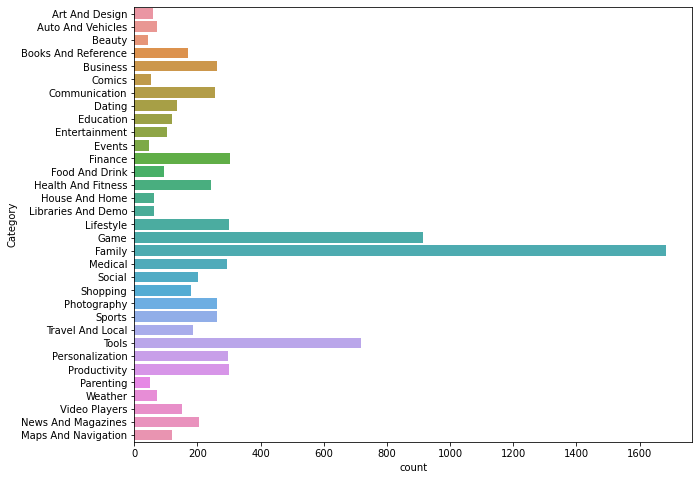

In [10]:
plt.figure(figsize = (10,8))
sns.countplot( y = "Category",data = df)

In [11]:
#what is the average size of free apps and paid apps.

df.groupby("Type").mean()["Size"]

C:\Users\barat\AppData\Local\Temp\ipykernel_5028\1436836012.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Type").mean()["Size"]


Type
Free    18.931883
Paid    18.464349
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

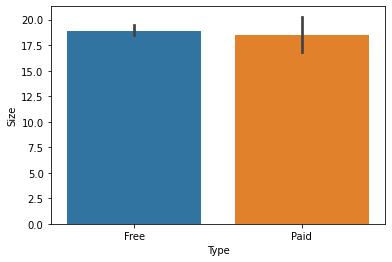

In [12]:
sns.barplot(x = "Type", y ="Size",data = df ,estimator= np.mean)

In [13]:
#what are the 5 top expencive apps that have rate of 5.

df[df["Rating"] ==5].sort_values(by = "Price",ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
4275,AP Art History Flashcards,Family,5.0,1,96.00000,10,Paid,29.99,NaN,"January 19, 2016",3.30,4.0,Education
5705,USMLE Step 2 CK Flashcards,Family,5.0,1,40.00000,10,Paid,19.99,Others,"May 26, 2014",2.47,2.2,Education
4073,Hey AJ! It's Bedtime!,Family,5.0,1,63.00000,10,Paid,4.99,Others,"April 4, 2018",1.0.59,2.3,Education
4270,meStudying: AP English Lit,Family,5.0,1,0.63965,10,Paid,4.99,Others,"August 31, 2013",1.3,2.0.1,Education
5526,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1,27.00000,100,Paid,4.99,Others,"March 28, 2018",1.5.2,4.1,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,BV Mobile Apps,Productivity,5.0,3,4.80000,100,Free,0.00,Others,"June 5, 2018",2.0,4.2,Productivity
5291,BV,Communication,5.0,3,1.60000,100,Free,0.00,Others,"August 4, 2016","1,01",3.0,Communication
5295,BV Sridhara Maharaj,Family,5.0,8,2.70000,100,Free,0.00,Others,"December 3, 2017",1.1,4.1,Entertainment
5296,Bacterial vaginosis Treatment - Sexual disease,Health And Fitness,5.0,2,5.90000,500,Free,0.00,Others,"June 25, 2018",2.0,4.0.3,Health & Fitness


In [14]:
#how many apps that have more then 50k reviews.

df[df["Reviews"]>50000].sort_values(by = "Reviews")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
2268,DraftKings - Daily Fantasy Sports,Sports,4.5,50017,41.0,1000000,Free,0.0,NaN,"July 24, 2018",3.21.324,4.4,Sports
7434,Masha and The Bear Jam Day Match 3 games for kids,Family,4.6,50060,98.0,1000000,Free,0.0,Others,"August 7, 2018",1.4.83,4.1,Puzzle
6363,Bokeh (Background defocus),Photography,4.0,50109,1.0,10000000,Free,0.0,Others,"June 7, 2018",Varies with device,-1,Photography
2270,Fantasy Football,Sports,3.5,50179,23.0,1000000,Free,0.0,Others,"August 2, 2018",2.5.7.1,5.0,Sports
988,Calorie Counter - EasyFit free,Health And Fitness,4.7,50294,11.0,1000000,Free,0.0,Others,"July 9, 2018",3.0.7,4.1,Health & Fitness
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,Clash of Clans,Game,4.6,44891723,98.0,100000000,Free,0.0,Others,"July 15, 2018",10.322.16,4.1,Strategy
286,Messenger – Text and Video Chat for Free,Communication,4.0,56642847,1.0,1000000000,Free,0.0,Others,"August 1, 2018",Varies with device,-1,Communication
1893,Instagram,Social,4.5,66577313,1.0,1000000000,Free,0.0,Teen,"July 31, 2018",Varies with device,-1,Social
287,WhatsApp Messenger,Communication,4.4,69119316,1.0,1000000000,Free,0.0,Others,"August 3, 2018",Varies with device,-1,Communication


In [15]:
#what is the average price of the apps for each genre with each installs numbers.

pd.pivot_table(index = "Category", columns = "Installs", values = "Price",data = df,aggfunc=np.mean)

Installs,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Category,,,,,,,,,,,,,,,,,,,
Art And Design,NaN,NaN,NaN,NaN,0.000000,NaN,0.663333,0.663333,0.180909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
Auto And Vehicles,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.398000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Beauty,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Books And Reference,NaN,0.0,NaN,1.750000,3.990000,0.330000,0.202800,0.506000,0.187083,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.0,NaN,0.0
Business,NaN,0.0,0.415000,2.996667,0.541250,1.383846,0.230256,0.000000,0.066444,0.000000,0.344138,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN,NaN
Comics,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Communication,NaN,NaN,0.000000,0.000000,0.496429,1.661667,0.539167,0.439412,0.498333,0.000000,0.572632,0.000000,0.071190,0.0,0.000000,0.0,0.0,0.0,0.0
Dating,NaN,NaN,0.000000,NaN,0.887778,0.000000,0.873750,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,NaN,NaN,NaN,4.990000,NaN,0.000000,0.000000,0.199500,0.306923,0.000000,0.0,0.000000,NaN,0.0,NaN,NaN


In [16]:
# how many apps have rating >4.7 and what is their avg price.

df[df["Rating"]>4.7]["Price"].mean()

0.4612975778546713

In [17]:
#how much google earned from the 5,000,000+ installed apps

df.groupby(["Installs"]).sum()["Price"]

C:\Users\barat\AppData\Local\Temp\ipykernel_5028\1669085846.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Installs"]).sum()["Price"]


Installs
1                2.48
5                0.00
10             102.37
50              31.39
100            668.37
500            128.65
1000          2324.24
5000          1416.98
10000         2374.41
50000          582.89
100000         782.56
500000          38.38
1000000         53.30
5000000          0.00
10000000         7.98
50000000         0.00
100000000        0.00
500000000        0.00
1000000000       0.00
Name: Price, dtype: float64

In [18]:
# what is the max and min size for free and paid apps.

df.groupby("Type").describe()["Size"]

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7672.0,18.931883,22.374045,0.00830,2.9,9.60,27.00,100.0
Paid,604.0,18.464349,22.421981,0.01367,1.8,7.95,27.25,100.0


<AxesSubplot:xlabel='Type', ylabel='Size'>

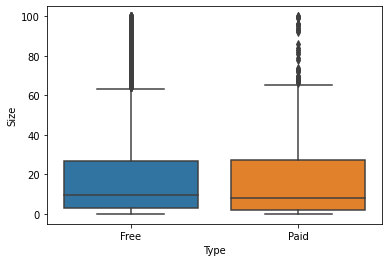

In [19]:
sns.boxplot(x = "Type", y = "Size", data = df)

In [20]:
# Analysing the relation between rating, reviews,size with the price of the app.

df.corr()

C:\Users\barat\AppData\Local\Temp\ipykernel_5028\340963242.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.059430,0.041181,0.042372,-0.021316
Reviews,0.059430,1.000000,0.056789,0.611471,-0.008080
Size,0.041181,0.056789,1.000000,-0.005860,-0.017899
Installs,0.042372,0.611471,-0.005860,1.000000,-0.009859
Price,-0.021316,-0.008080,-0.017899,-0.009859,1.000000


C:\Users\barat\AppData\Local\Temp\ipykernel_5028\3811762318.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<AxesSubplot:>

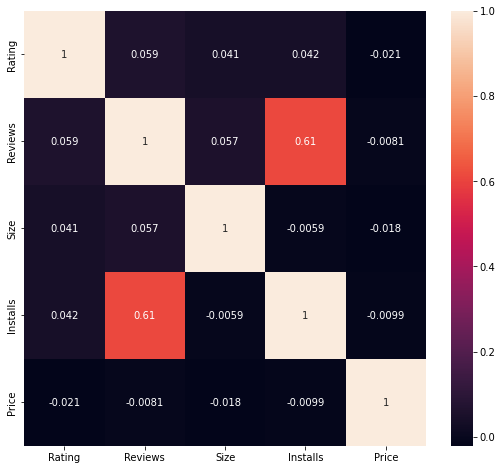

In [21]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),annot = True)

In [23]:
# How many apps that can work on android version 4.
#count of apps that can work on each android version.

df["Minimum Android Ver"].value_counts()

4.1      1843
4.0.3    1152
4.0      1045
-1        963
4.4       728
2.3       554
5.0       454
4.2       315
2.3.3     233
2.2       203
3.0       202
4.3       187
2.1       112
1.6        87
7.0        42
6.0        42
3.2        31
2.0        27
5.1        16
1.5        15
3.1         8
2.0.1       7
8.0         5
7.1         3
1.0         2
Name: Minimum Android Ver, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Minimum Android Ver'>

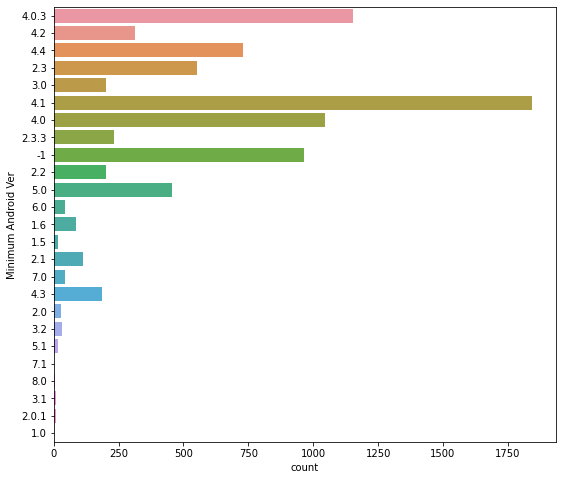

In [24]:
plt.figure(figsize=(9,8))
sns.countplot(y = "Minimum Android Ver",data = df)